In [6]:
import numpy as np
import matplotlib.pyplot as plt
from adopty.lista import Lista
from adopty.ista import ista

In [11]:
from adopty.datasets import make_sparse_coding
from adopty.utils import check_tensor

from celer import Lasso

n_samples = 1
n_dim, n_atoms = 100, 500

random_state = None

X, D, z = make_sparse_coding(n_samples=n_samples, n_dim=n_dim, n_atoms=n_atoms,
                             reg=.1, random_state=random_state,
                             sparsity_filter='>0')

In [12]:
def analytic_gradient(D, X, z):
    return z.T.dot((z.dot(D) - X))


def get_analytic_jacobian(D, X, z):
    S = np.nonzero(z)[1]
    D_S = D[S]
    J = D_S.T.dot(np.linalg.pinv(D_S.dot(D_S.T)).dot(D_S))
    return J


def pearson(g1, g2):
    g1, g2 = g1.ravel(), g2.ravel()
    norm = (np.linalg.norm(g1, ord=2)*np.linalg.norm(g2, ord=2))
    norm = norm if norm > 1e-15 else 1
    return g1.dot(g2) / norm


def diff(g1, g2):
    g1, g2 = g1.ravel(), g2.ravel()
    return np.linalg.norm(g1 - g2, ord=2)
    

def loss(D, X, z, reg):
    diff = X - z.dot(D)
    return .5 * (diff*diff).sum() + reg * abs(z).sum()


def tr(A):
    return np.diag(A).sum()


def st(x, mu):
    return np.sign(x) * np.maximum(0, abs(x) - mu)


In [13]:
# Display function
COLORS = {
    'analytic': 'C0',
    'autodiff': 'C1',
}

def display_results(results, reg_1):
    results = results[reg_1]
    corr_ana, corr_auto = results['corr_ana'], results['corr_auto']
    diff_ana, diff_auto = results['diff_ana'], results['diff_auto']
    tr_J_ana, tr_J_auto = results['tr_J_ana'], results['tr_J_auto']
    nnz = results['nnz']
    
    # display the results
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[1].set_title(f"$\lambda = {reg_1:.1e}$", fontsize=24)


    axes[0].set_ylabel("Pearson coef", fontsize=18)
    axes[0].loglog(layers, corr_ana, COLORS['analytic'], label='Analytic')
    axes[0].loglog(layers, corr_auto, COLORS['autodiff'], label='Autodiff')

    axes[1].set_ylabel("$\ell_2$ diff", fontsize=18)
    axes[1].loglog(layers, diff_ana, COLORS['analytic'], label='Analytic')
    axes[1].loglog(layers, diff_auto, COLORS['autodiff'], label='Autodiff')

    axes[2].set_ylabel("Tr$(J)$", fontsize=18)
    axes[2].loglog(layers, tr_J_ana, COLORS['analytic'], label='Analytic')
    axes[2].loglog(layers, tr_J_auto, COLORS['autodiff'], label='Autodiff')
    axes[2].hlines(nnz, layers[0], layers[-1], color='k', linestyle='--')
    axes[2].set_xlim(layers[0], layers[-1])

    axes[2].legend(loc='lower left', fontsize=18, ncol=2,
                   bbox_to_anchor=[0, 1, 1, .3])
    plt.tight_layout()
    plt.pause(0.01)

!!! Inner solver did not converge at epoch 49999, gap: 5.19e-08 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 7.84e-08 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 1.98e-07 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 3.13e-08 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 1.55e-08 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 4.34e-09 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 7.08e-10 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 7.65e-10 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 7.63e-10 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 7.62e-10 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 7.61e-10 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 7.59e-10 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 7.58e-10 > 1.00e-12
!!! Inner solver did not 

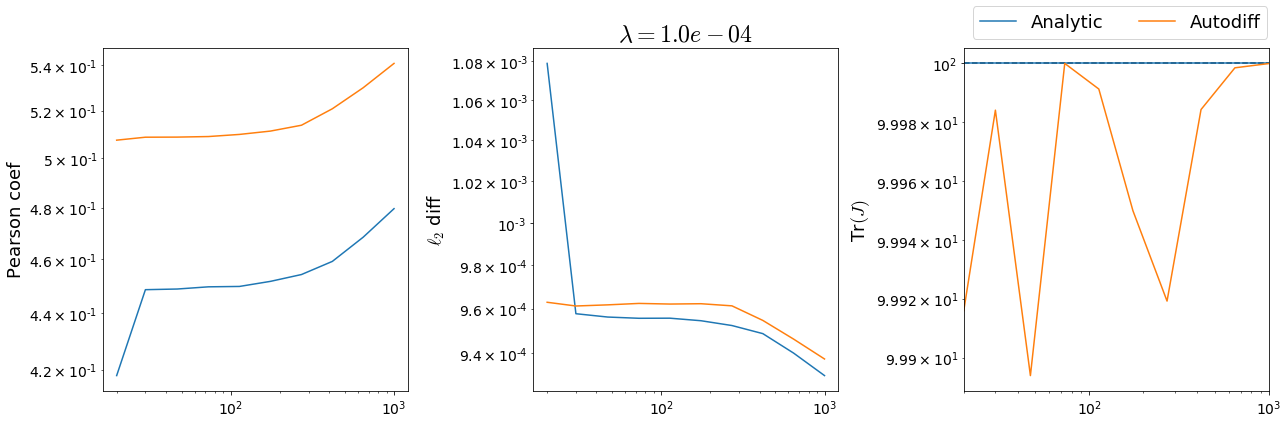

!!! Inner solver did not converge at epoch 49999, gap: 4.17e-08 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 1.46e-07 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 2.90e-08 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 5.98e-09 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 6.64e-09 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 6.63e-09 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 6.62e-09 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 3.99e-09 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 4.34e-09 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 4.34e-09 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 4.33e-09 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 4.33e-09 > 1.00e-12
!!! Inner solver did not converge at epoch 49999, gap: 1.47e-09 > 1.00e-12
!!! Inner solver did not 

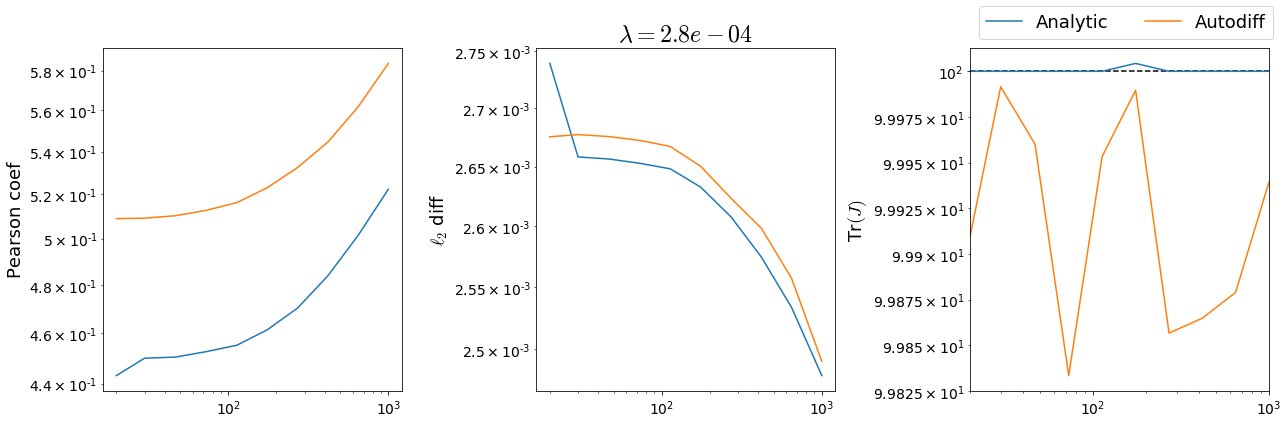

Solution stability: 3.77e-08


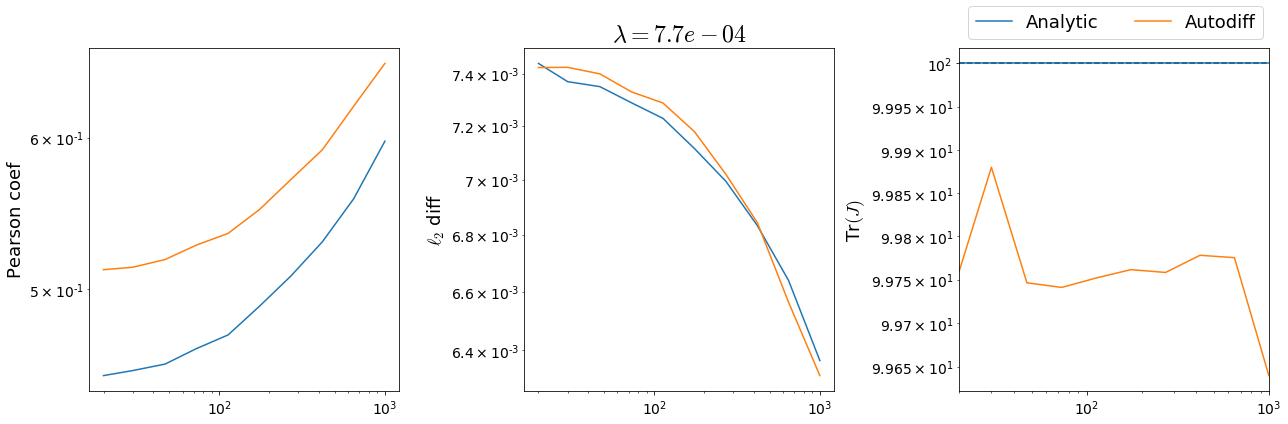

!!! Inner solver did not converge at epoch 49999, gap: 1.51e-08 > 1.00e-12
Solution stability: 4.45e-08


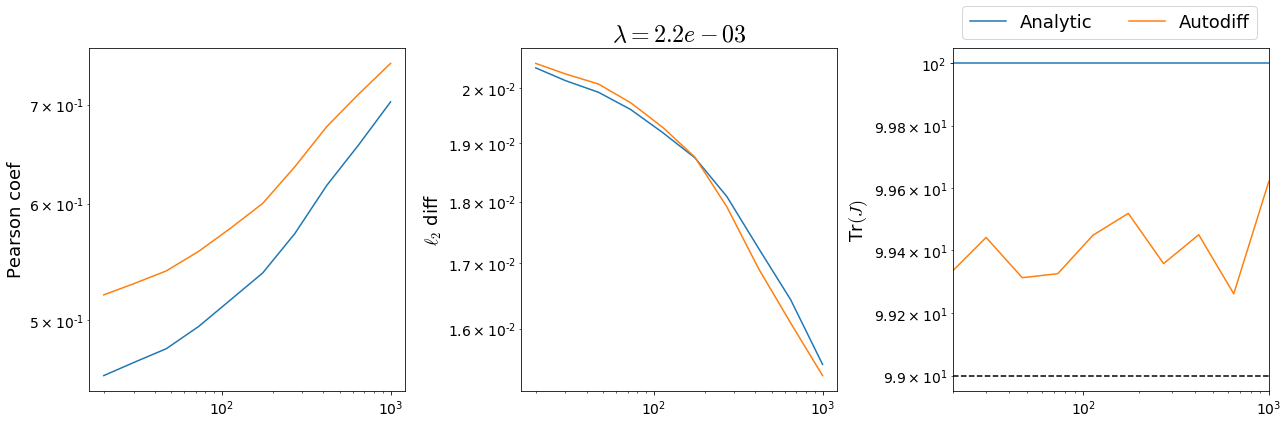

Solution stability: 1.51e-07


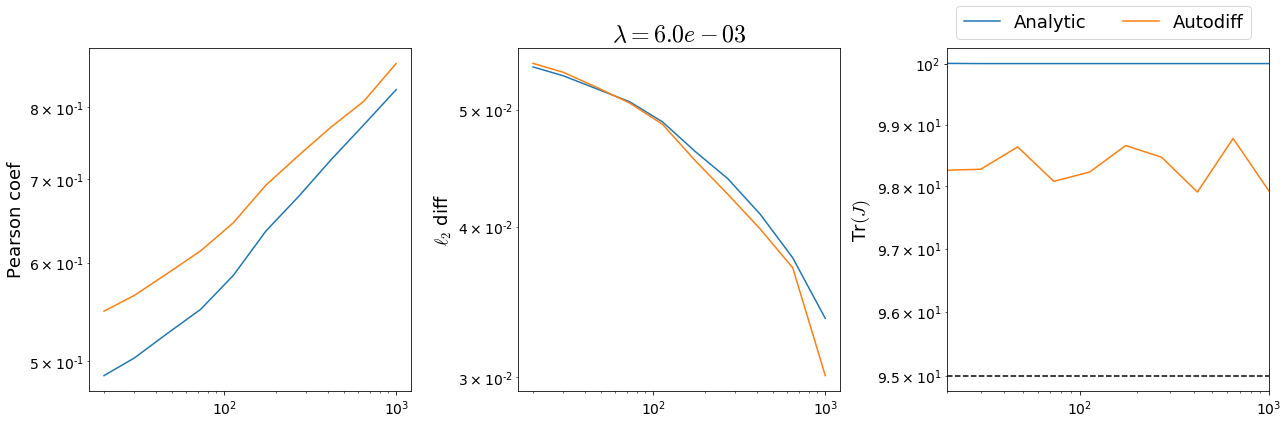

Solution stability: 3.33e-08


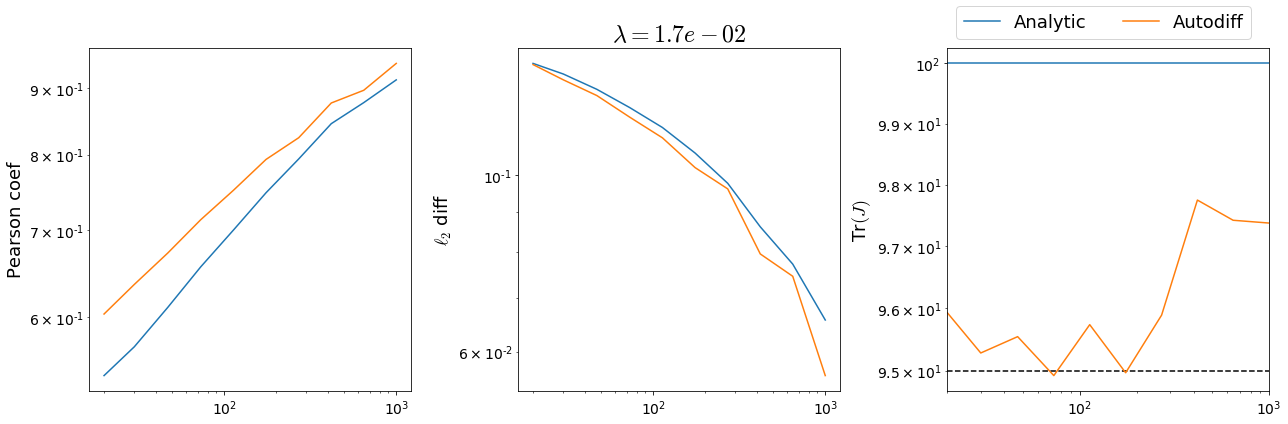

Solution stability: 1.91e-07


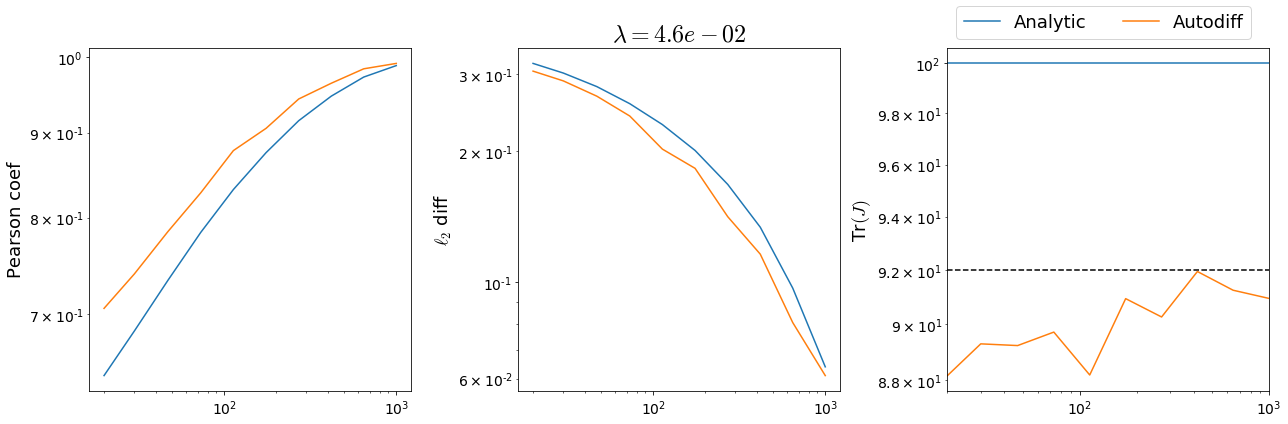

Solution stability: 1.92e-07


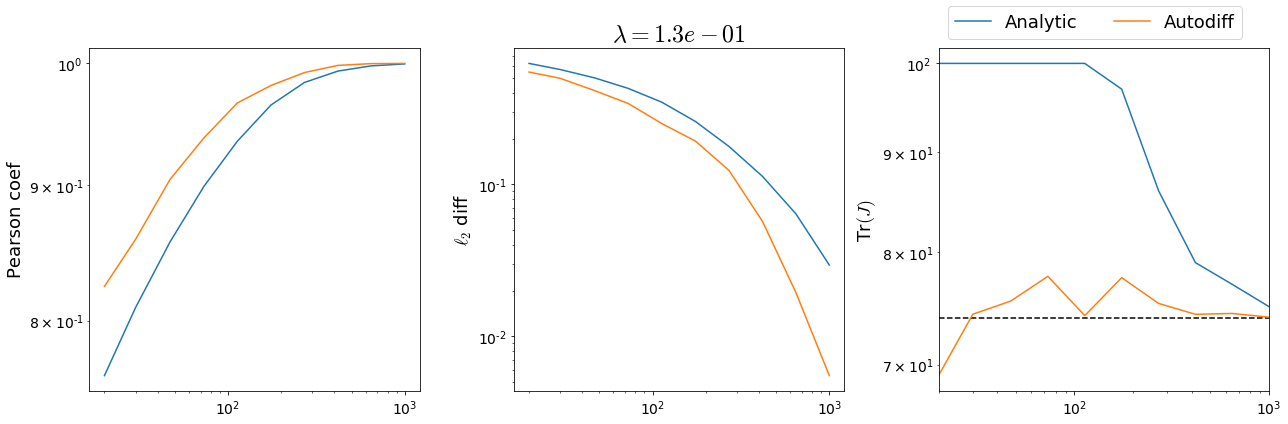

Solution stability: 2.02e-11


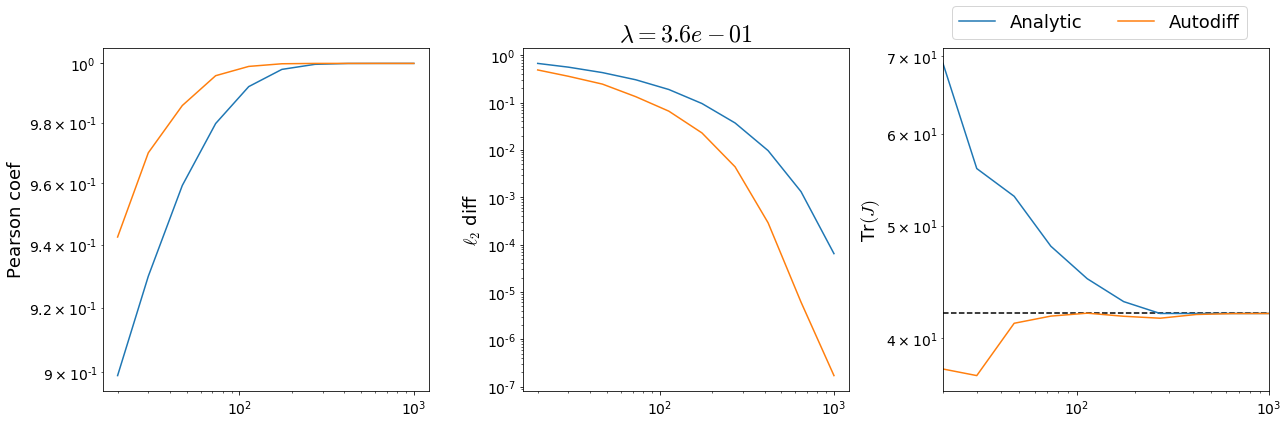

Solution stability: 2.22e-16


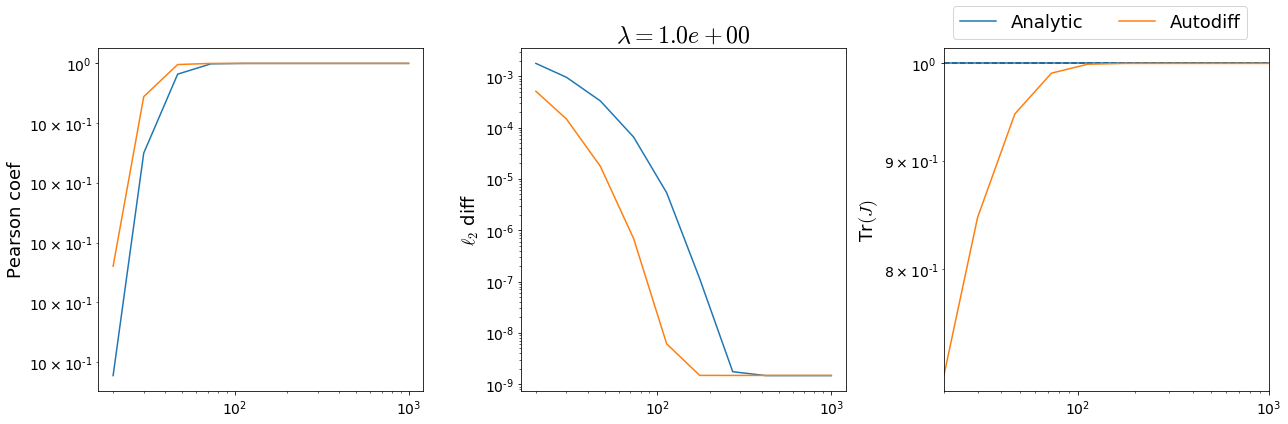

In [14]:
results = {}

for reg_1 in np.logspace(-4, -1e-3, 10):


    # Compute Optimal solution
    lasso = Lasso(alpha=reg_1 / X.shape[1], fit_intercept=False,
                  tol=1e-12)
    lasso.fit(D.T, X.T)
    z_star = lasso.coef_[None]
    nnz = len(np.nonzero(z_star)[0])
    g_hat = analytic_gradient(D, X, z_star)

    # Check solution optimality
    grad = (z_star.dot(D) - X).dot(D.T)
    stability = abs(st(z_star - grad, reg_1) - z_star).max()
    print(f"Solution stability: {stability:.2e}")
    layers = np.unique(np.logspace(np.log10(20), np.log10(1000), 10, dtype=int))
    
    # Compute gradient and jacobian by layers
    corr_ana, corr_auto = [], []
    diff_ana, diff_auto = [], []
    tr_J_ana, tr_J_auto = [], []
    for layer in layers:
        print(f"Gradient layer {layer} / {layers.max()}\r", end='', flush=True)
        lista = Lista(D, layer, parametrization="dictionary")
        z = lista.transform(X, reg_1)
        g_ana = analytic_gradient(D, X, z)
        g_auto = lista.gradient_D(X, reg_1)
        corr_ana += [pearson(g_hat, g_ana)]
        corr_auto += [pearson(g_hat, g_auto.numpy())]
        diff_ana += [diff(g_hat, g_ana)]
        diff_auto += [diff(g_hat, g_auto.numpy())]
        
        tr_J_auto += [tr(lista.get_jacobian(X, reg_1))]
        tr_J_ana += [tr(get_analytic_jacobian(D, X, z))]

    results[reg_1] = dict(
        corr_ana=corr_ana, corr_auto=corr_auto, diff_ana=diff_ana,
        diff_auto=diff_auto, tr_J_ana=tr_J_ana, tr_J_auto=tr_J_auto,
        nnz=nnz
    )
    
    display_results(results, reg_1)


In [ ]:
for reg_1 in np.logspace(-4, -1e-3, 10):
    display_results(results, reg_1)